In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # longueur et largeur des pétales
y = iris.target

tree = DecisionTreeClassifier(max_depth=100, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=100, random_state=42)

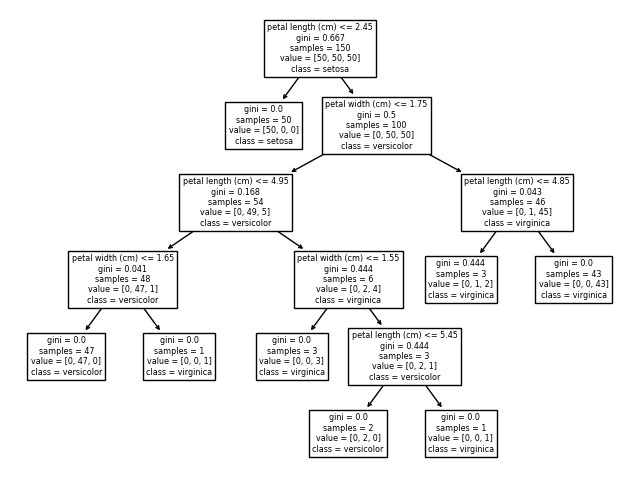

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=iris.feature_names[2:],
              class_names=iris.target_names, ax=ax)



samples : nb d'observations passées par ce noeud
value: nb d' observations d'entrainement de chaque classe passées par ce noeud
gini : impureté du noeud (gini=0 -> noeud pur si toutes les observations d'entrainement qui y aboutissent appartiennent à la même classe

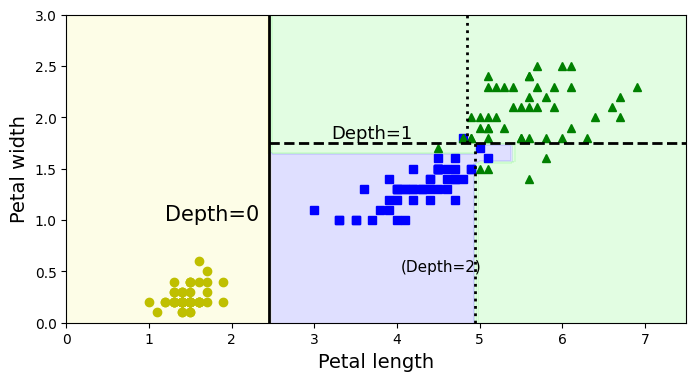

In [3]:
import numpy as np

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.20, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

Exercice : entrainez et réglez un arbre de décision pour le jeu de données moons 
- générez un jeu de données moons avec make_moons(n_samples=10000, noise 0.4)
- partagez-le en jeu d'entrainement/jeu de test
- utilisezune recherche par quadrillage avec validation croisée (à l'aide de la classe GridSearchCV) pour rechercher les bonnes valeurs d'hyperparamètres
- entrainez l'arbre de décision sur l'ens du jeu d'entrainement en utilisant ces hyperparamètres et mesurez les performances de votre modèle sur le jeu de test.